In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

#Parameters
L = 101
T = 100
N = 3
K = 3
Seed = 100
rnd.seed(Seed)

#Inital Cells
cell_init= [rnd.randint(0, N-1) for i in range(L)]
# print (cell_init)

#Rule
def L_R(Lambda):
    Rule = [(0 if rnd.random()<(1.0-Lambda) else rnd.randint(1, N-1)) for i in range(N**K)]
#    print (Rule)
    return (Rule)

def ca_1d(l, t, Lambda, cell_i, n, k):
    rule = L_R(Lambda)
    cell = cell_i
    data = [cell]
    for i in range (t):
        cell_next  = [0 for i in range (l)]
        for j in range (l):
            neighboringstate = 0
            for m in range(k):
                neighboringstate+= cell[int((j+(m-(k-1)/2)+l)%l)]*(n**(k-1-m))
            cell_next[j]= rule[neighboringstate]    
        cell = cell_next
        data.append(cell)
           
    return (data)

#print Graph, RNO for Rule, N for Grpah Amount and n for No.
"""def output_graph(Lambda):
    fig = plt.figure(figsize = (5,6))
    ax = fig.add_subplot(1,1,1)
    dataXY = ca_1d(L, T, Lambda, cell_init, N, K)
    ax.pcolor(np.array(dataXY), vmin = 0, vmax = N-1)
    ax.set_xlim(0, L)
    ax.set_ylim(T-1, 0)
    ax.set_xlabel("cell number")
    ax.set_ylabel("step")
    ax.set_title("rule"+str(Lambda))
    
output_graph(0.3)

plt.show()
"""

'def output_graph(Lambda):\n    fig = plt.figure(figsize = (5,6))\n    ax = fig.add_subplot(1,1,1)\n    dataXY = ca_1d(L, T, Lambda, cell_init, N, K)\n    ax.pcolor(np.array(dataXY), vmin = 0, vmax = N-1)\n    ax.set_xlim(0, L)\n    ax.set_ylim(T-1, 0)\n    ax.set_xlabel("cell number")\n    ax.set_ylabel("step")\n    ax.set_title("rule"+str(Lambda))\n    \noutput_graph(0.3)\n\nplt.show()\n'

In [7]:
#Transpose the data list to make up for calculation
def transp(data):
    transposed = list(map(list, zip(*data)))
    return transposed

#P1
def calcEntropy(data):
    dic = {}
    for d in data:
        if d in dic:
            dic[d] = dic[d] + 1
        else:
            dic[d] = 1
    probdist = np.array(list(dic.values()))/(float)(len(data))
    return (sum(-p * np.log2(p) for p in probdist))

#P2
def calcJointEntropy(x,y):
    xy= [(x[i], y[i]) for i in range(len(x))]
    return(calcEntropy(xy))

#P3
def calcMI(x,y):  
    hx = calcEntropy(x)
    hy = calcEntropy(y)
    hxy = calcJointEntropy(x,y)
    return (hx+hy-hxy)

#P4
def calcCAMList(data):
    CAMList = []
    for i in range (len(data[0])):
        CAMList.append(calcMI(data[i][0:-1],data[i][1:]))
    return (CAMList)

#P5
def calcCAMI(data):
    CAMList = calcCAMList(data)
    average = np.average(CAMList)
    return (average)    

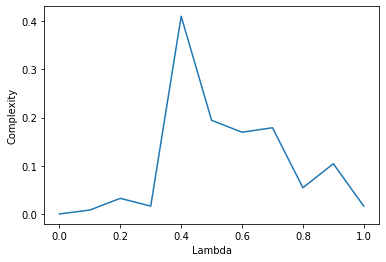

In [8]:
def Lambda_CA():
    dataL = []
    dataCA = []
    for i in range (11):
        Lambda = i/10
        dataL.append(Lambda)
        dataXY = ca_1d(L, T, Lambda, cell_init, N, K)
        CAMI = calcCAMI(transp(dataXY))
        dataCA.append(CAMI)
    return (dataL, dataCA)

dataL, dataCA = Lambda_CA()

plt.xlabel("Lambda")
plt.ylabel("Complexity")
plt.plot(dataL, dataCA)
#plt.set_title("N = "+N+" K = "+K)
plt.show()
        